# Help

The notebook retrives the data from the Un Com Trade and prepares the data for ready analysis. The parameters in the next cell can be changed and the notebook can be run again to get updated results. The code paramaters can be located using the links.

* Reporter Area (r): https://comtrade.un.org/Data/cache/reporterAreas.json
* Partner Area (p): https://comtrade.un.org/Data/cache/partnerAreas.json
* Frequency (freq): Monthly - M, Annual - A
* Period (ps) : Annual (YYYY) - 2019, Monthly (YYYY or YYYYMM): Individual periods as 201001 or full years as 2010, automatically expands to query periods 201001,201002,201003,...,201012.
* Classification (px): HS
* Regime (rg) : [{'id': '1', 'text': 'Import'}, {'id': '2', 'text': 'Export'}, {'id': '3', 'text': 're-Export'}, {'id': '4', 'text': 're-Import'}]
* Classification Code (cc): a commodity code valid in the selected classification. Full lists of codes for each classification are linked to above under the px parameter. Some codes are valid in all classifications - 
TOTAL Total trade between reporter and partner, no detail breakdown. AG1, AG2, AG3, AG4, AG5, AG6 Detailed codes at a specific digit level. For instance AG6 in HS gives all of the 6-digit codes, which are the most detailed codes that are internationally comparable. Not all classifications have all digit levels available.  ALL All codes in the classification.

**a series is reporter data, b series is partner data**

**Make change to other cell at your own discretion. A wrong change will break the application. When making change in the next cell, please make sure the value is enclosed by single quote. When data is pulled you can see the parameters which are used to full data**

In [1]:
# Reporter
reporter = '699' # India
# Partner
partner = '418' # Laos
# Period
period = '2019' # Annual

# Initialisation

In [2]:
import os
import sys
sys.path.append("../..") 
ROOT_DIR = '/home/jovyan/tta'

import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
plt.rcParams['figure.figsize'] = [20, 10]

from comtrade.analysis import Analysis
tta = Analysis()

# Available

In [3]:
status = tta.data_available(reporter, period + '12', 'HS', 'M')
print(status)
status = tta.data_available(partner, period + '12', 'HS', 'M')
print(status)

[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '699', 'rDesc': 'India', 'ps': '201912', 'TotalRecords': 251502, 'isOriginal': 1, 'publicationDate': '2020-03-02T00:00:00', 'isPartnerDetail': 1}]
[{'type': 'COMMODITIES', 'freq': 'MONTHLY', 'px': 'HS', 'r': '418', 'rDesc': "Lao People's Dem. Rep.", 'ps': '201912', 'TotalRecords': 15299, 'isOriginal': 1, 'publicationDate': '2020-06-14T00:00:00', 'isPartnerDetail': 1}]


# CTH2

In [4]:
cc = 'AG2'
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df2 = tta.prepare(data)

{'r': '699', 'p': '418', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}
{'r': '418', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG2', 'freq': 'A', 'max': '100000'}


In [5]:
df2['QR'] = df2['quantity_a'] / df2['quantity_b']
df2['VR'] = df2['value_a'] / df2['value_b']
df2.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,QR,VR
02,02,Meat and edible meat offal,0,No Quantity,1.41,0,No Quantity,3.46,-2.05,0,NaN,-145.390071,2.05,145.390071,NaN,0.407514
11,11,"Products of the milling industry; malt, starch...",0,No Quantity,0.00,0,No Quantity,0.59,-0.59,0,NaN,-inf,0.59,inf,NaN,0.000000
12,12,Oil seeds and oleaginous fruits; miscellaneous...,0,No Quantity,0.00,0,No Quantity,0.00,0.00,0,NaN,NaN,0.00,NaN,NaN,NaN
20,20,"Preparations of vegetables, fruit, nuts or oth...",0,No Quantity,0.10,0,No Quantity,0.00,0.10,0,NaN,100.000000,0.10,100.000000,NaN,inf
21,21,Miscellaneous edible preparations,0,No Quantity,0.01,0,No Quantity,0.09,-0.08,0,NaN,-800.000000,0.08,800.000000,NaN,0.111111
23,23,"Food industries, residues and wastes thereof; ...",0,No Quantity,1.88,0,No Quantity,1.93,-0.05,0,NaN,-2.659574,0.05,2.659574,NaN,0.974093
24,24,Tobacco and manufactured tobacco substitutes,0,No Quantity,0.01,0,No Quantity,0.00,0.01,0,NaN,100.000000,0.01,100.000000,NaN,inf
26,26,"Ores, slag and ash",0,No Quantity,0.00,0,No Quantity,0.01,-0.01,0,NaN,-inf,0.01,inf,NaN,0.000000
28,28,Inorganic chemicals; organic and inorganic com...,0,No Quantity,0.01,0,No Quantity,0.08,-0.07,0,NaN,-700.000000,0.07,700.000000,NaN,0.125000
29,29,Organic chemicals,0,No Quantity,0.21,0,No Quantity,0.30,-0.09,0,NaN,-42.857143,0.09,42.857143,NaN,0.700000


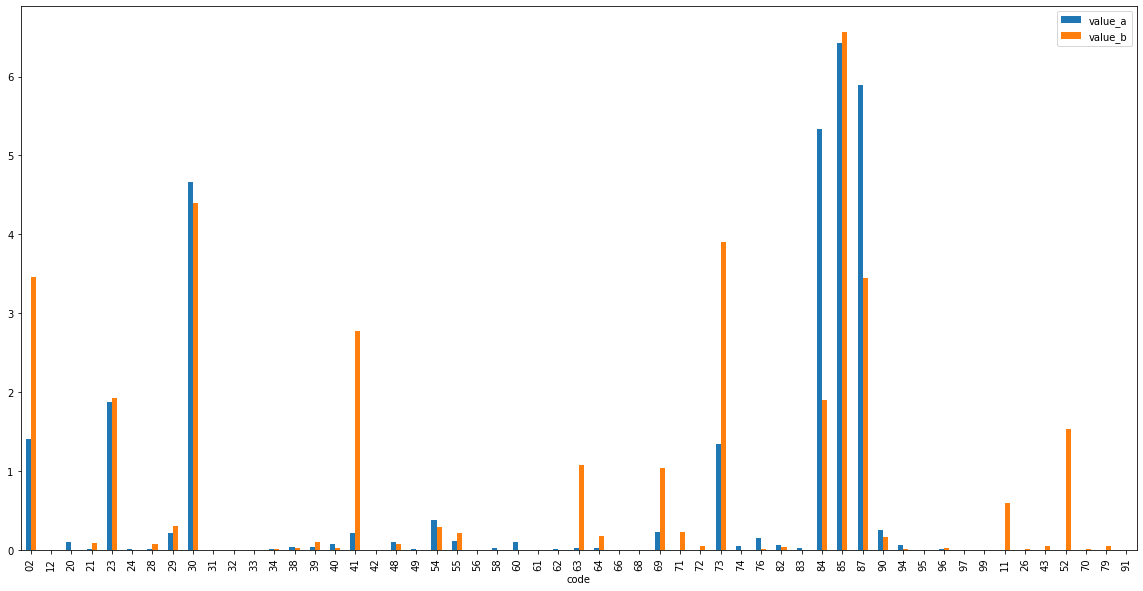

In [6]:
df2.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [7]:
df2.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH4

In [8]:
cc = 'AG4'
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df4 = tta.prepare(data)

{'r': '699', 'p': '418', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}
{'r': '418', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG4', 'freq': 'A', 'max': '100000'}


In [9]:
df4['QR'] = df4['quantity_a'] / df4['quantity_b']
df4['VR'] = df4['value_a'] / df4['value_b']
df4.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,QR,VR
0202,0202,Meat of bovine animals; frozen,259000,Weight in kilograms,0.76,1582000,Weight in kilograms,3.36,-2.60,-1323000,-5.108108e+02,-3.421053e+02,2.60,3.421053e+02,0.163717,0.226190
0206,0206,"Edible offal of bovine animals, swine, sheep, ...",290000,Weight in kilograms,0.66,25000,Weight in kilograms,0.10,0.56,265000,9.137931e+01,8.484848e+01,0.56,8.484848e+01,11.600000,6.600000
1102,1102,Cereal flours; other than of wheat or meslin,0,Weight in kilograms,0.00,5000,Weight in kilograms,0.00,0.00,-5000,-inf,NaN,0.00,NaN,0.000000,NaN
1105,1105,"Flour, meal, powder, flakes, granules and pell...",0,Weight in kilograms,0.00,621000,Weight in kilograms,0.59,-0.59,-621000,-inf,-inf,0.59,inf,0.000000,0.000000
1209,1209,"Seeds, fruit and spores; of a kind used for so...",0,Weight in kilograms,0.00,4,Weight in kilograms,0.00,0.00,-4,-inf,NaN,0.00,NaN,0.000000,NaN
1211,1211,Plants and parts of plants (including seeds an...,4,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,4,1.000000e+02,NaN,0.00,NaN,inf,NaN
2008,2008,"Fruit, nuts and other edible parts of plants; ...",35444,Weight in kilograms,0.10,0,Weight in kilograms,0.00,0.10,35444,1.000000e+02,1.000000e+02,0.10,1.000000e+02,inf,inf
2106,2106,Food preparations not elsewhere specified or i...,600,Weight in kilograms,0.01,31590,Weight in kilograms,0.09,-0.08,-30990,-5.165000e+03,-8.000000e+02,0.08,8.000000e+02,0.018993,0.111111
2301,2301,"Flours, meal and pellets, of meat or meat offa...",60000,Weight in kilograms,0.07,121618,Weight in kilograms,0.15,-0.08,-61618,-1.026967e+02,-1.142857e+02,0.08,1.142857e+02,0.493348,0.466667
2302,2302,"Bran, sharps and other residues; whether or no...",0,Weight in kilograms,0.00,3666763,Weight in kilograms,0.81,-0.81,-3666763,-inf,-inf,0.81,inf,0.000000,0.000000


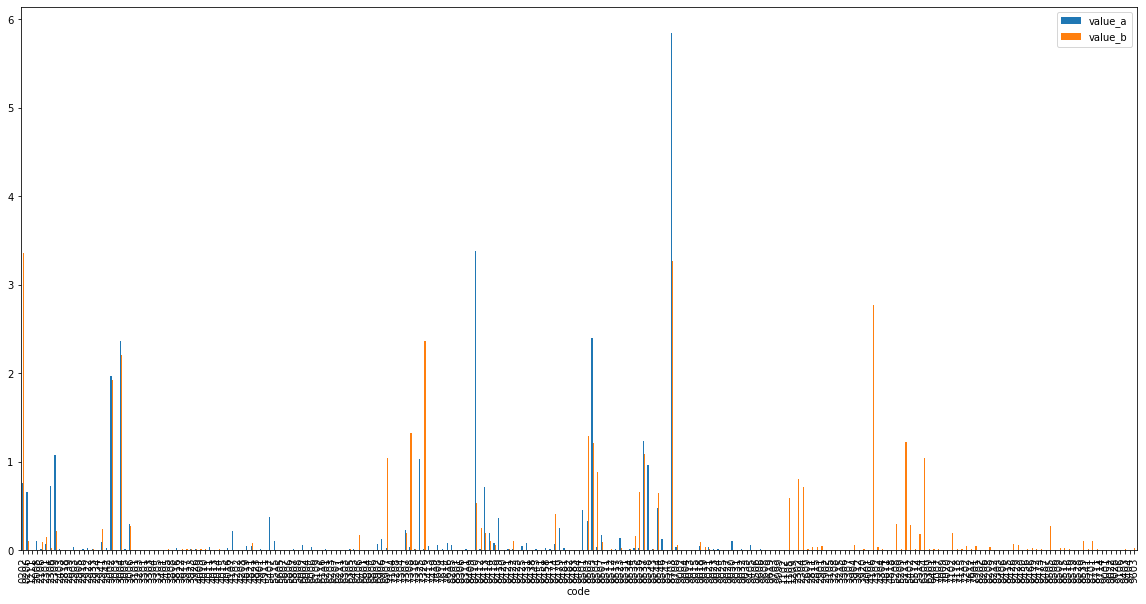

In [10]:
df4.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [11]:
df4.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# CTH6

In [12]:
cc = 'AG6'
data_out, data_in = tta.get_export_data(reporter, partner, period, cc) 
data = tta.compare(data_out, data_in)
df6 = tta.prepare(data)

{'r': '699', 'p': '418', 'rg': 2, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}
{'r': '418', 'p': '699', 'rg': 1, 'ps': '2019', 'px': 'HS', 'cc': 'AG6', 'freq': 'A', 'max': '100000'}


In [13]:
df6['QR'] = df6['quantity_a'] / df6['quantity_b']
df6['VR'] = df6['value_a'] / df6['value_b']
df6.sort_values(by=['code'])

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,QR,VR
020220,020220,"Meat; of bovine animals, cuts with bone in (ex...",0,Weight in kilograms,0.00,1268500,Weight in kilograms,2.53,-2.53,-1268500,-inf,-inf,2.53,inf,0.000000,0.000000
020230,020230,"Meat; of bovine animals, boneless cuts, frozen",259000,Weight in kilograms,0.76,313500,Weight in kilograms,0.83,-0.07,-54500,-2.104247e+01,-9.210526,0.07,9.210526,0.826156,0.915663
020629,020629,"Offal, edible; of bovine animals, (other than ...",290000,Weight in kilograms,0.66,25000,Weight in kilograms,0.10,0.56,265000,9.137931e+01,84.848485,0.56,84.848485,11.600000,6.600000
110220,110220,Cereal flour; of maize (corn),0,Weight in kilograms,0.00,5000,Weight in kilograms,0.00,0.00,-5000,-inf,NaN,0.00,NaN,0.000000,NaN
110510,110510,"Flour, meal and powder; of potatoes",0,Weight in kilograms,0.00,621000,Weight in kilograms,0.59,-0.59,-621000,-inf,-inf,0.59,inf,0.000000,0.000000
120929,120929,"Seeds of forage plants; other than lucerne, cl...",0,Weight in kilograms,0.00,4,Weight in kilograms,0.00,0.00,-4,-inf,NaN,0.00,NaN,0.000000,NaN
121190,121190,Plants and parts (including seeds and fruits) ...,4,Weight in kilograms,0.00,0,Weight in kilograms,0.00,0.00,4,1.000000e+02,NaN,0.00,NaN,inf,NaN
200811,200811,"Nuts; ground-nuts, whether or not containing a...",3940,Weight in kilograms,0.01,0,Weight in kilograms,0.00,0.01,3940,1.000000e+02,100.000000,0.01,100.000000,inf,inf
200819,200819,Nuts and other seeds; whether or not containin...,31504,Weight in kilograms,0.08,0,Weight in kilograms,0.00,0.08,31504,1.000000e+02,100.000000,0.08,100.000000,inf,inf
210610,210610,Protein; concentrates and textured protein sub...,0,Weight in kilograms,0.00,86,Weight in kilograms,0.00,0.00,-86,-inf,NaN,0.00,NaN,0.000000,NaN


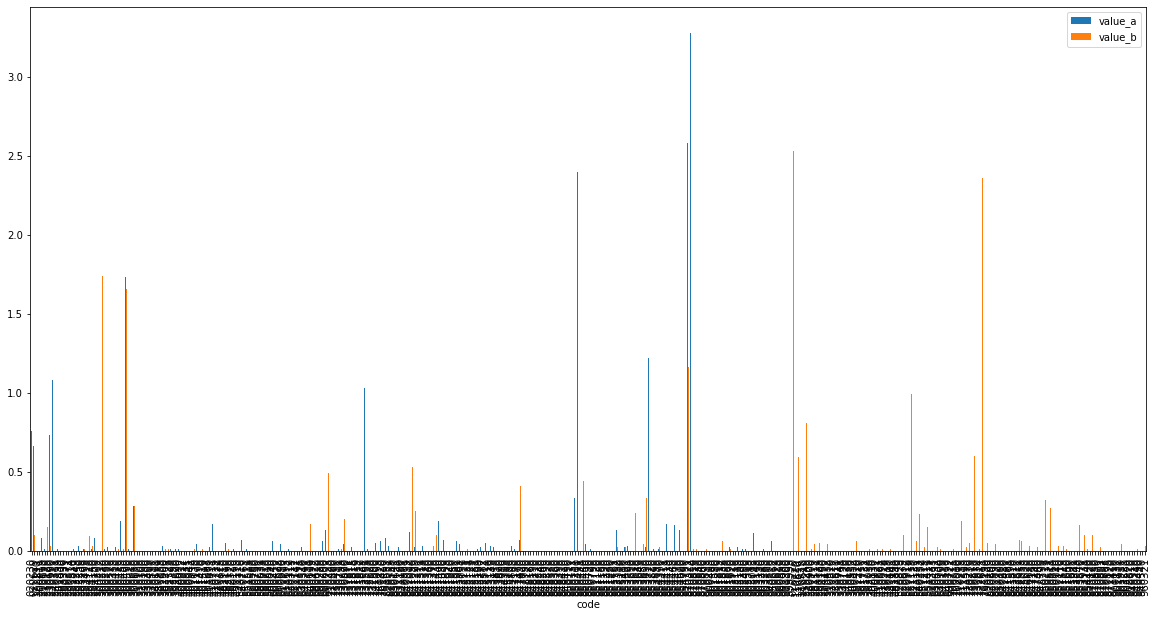

In [14]:
df6.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

In [15]:
df6.to_csv('export_' + str(partner) + '_' + str(reporter) + '_' + str(period) + '_' + str(cc) + '.csv')

# Aggregation

In [16]:
df = df6
df['CTH6'] = df['code']
df['CTH4'] = df['code'].str.slice(0,4)
df['CTH2'] = df['code'].str.slice(0,2)
df['QR'] = df['quantity_a'] / df['quantity_b']
df['VR'] = df['value_a'] / df['value_b']
df.groupby(['CTH2']).sum()

,quantity_a,value_a,quantity_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,QR,VR
CTH2,,,,,,,,,,,,
02,549000,1.42,1607000,3.46,-2.04,-1058000,-inf,-inf,3.16,inf,12.426156,7.515663
11,0,0.00,626000,0.59,-0.59,-626000,-inf,-inf,0.59,inf,0.000000,0.000000
12,4,0.00,4,0.00,0.00,0,-inf,0.0,0.00,0.0,inf,0.000000
20,35444,0.09,0,0.00,0.09,35444,2.000000e+02,200.0,0.09,200.0,inf,inf
21,600,0.01,31590,0.08,-0.07,-30990,-inf,-700.0,0.07,700.0,0.019045,0.125000
23,3784000,1.88,5625941,1.93,-0.05,-1841941,-inf,-inf,3.17,inf,58.929776,29.709091
24,570,0.01,160,0.00,0.01,410,1.272727e+02,100.0,0.01,100.0,inf,inf
26,0,0.00,49130,0.01,-0.01,-49130,-inf,-inf,0.01,inf,0.000000,0.000000
28,2000,0.00,39200,0.08,-0.08,-37200,-inf,-inf,0.08,inf,inf,0.000000


# Summary

In [17]:
print("Total Export, as per reporter data:", df['value_a'].sum(), " million USD.")
print("Total Import, as per partner data:", df['value_b'].sum(), " million USD.")

Total Export, as per reporter data: 29.15  million USD.
Total Import, as per partner data: 34.58  million USD.


# Filter
Remove data where the value difference is less than 10 million and percentage difference is less than 10%

In [18]:
percentage_cutoff = 10 # value to filter
value_diff_cutoff = 1 # value to filter

dfi = df2 # Change to required data_frame
dfi = dfi[(dfi['value_pct_abs'] > percentage_cutoff) & (dfi['value_diff_abs'] > value_diff_cutoff)]
dfi.sort_values(by=['value_diff_abs'], ascending=False)

,code,desc,quantity_a,quantity_desc_a,value_a,quantity_b,quantity_desc_b,value_b,value_diff,quantity_diff,quantity_pct,value_pct,value_diff_abs,value_pct_abs,QR,VR
84,84,"Nuclear reactors, boilers, machinery and mecha...",0,No Quantity,5.34,0,No Quantity,1.90,3.44,0,NaN,64.419476,3.44,64.419476,NaN,2.810526
73,73,Iron or steel articles,0,No Quantity,1.34,0,No Quantity,3.90,-2.56,0,NaN,-191.044776,2.56,191.044776,NaN,0.343590
41,41,Raw hides and skins (other than furskins) and ...,0,No Quantity,0.22,0,No Quantity,2.77,-2.55,0,NaN,-1159.090909,2.55,1159.090909,NaN,0.079422
87,87,Vehicles; other than railway or tramway rollin...,0,No Quantity,5.89,0,No Quantity,3.45,2.44,0,NaN,41.426146,2.44,41.426146,NaN,1.707246
02,02,Meat and edible meat offal,0,No Quantity,1.41,0,No Quantity,3.46,-2.05,0,NaN,-145.390071,2.05,145.390071,NaN,0.407514
52,52,Cotton,0,No Quantity,0.00,0,No Quantity,1.53,-1.53,0,NaN,-inf,1.53,inf,NaN,0.000000
63,63,"Textiles, made up articles; sets; worn clothin...",0,No Quantity,0.02,0,No Quantity,1.08,-1.06,0,NaN,-5300.000000,1.06,5300.000000,NaN,0.018519


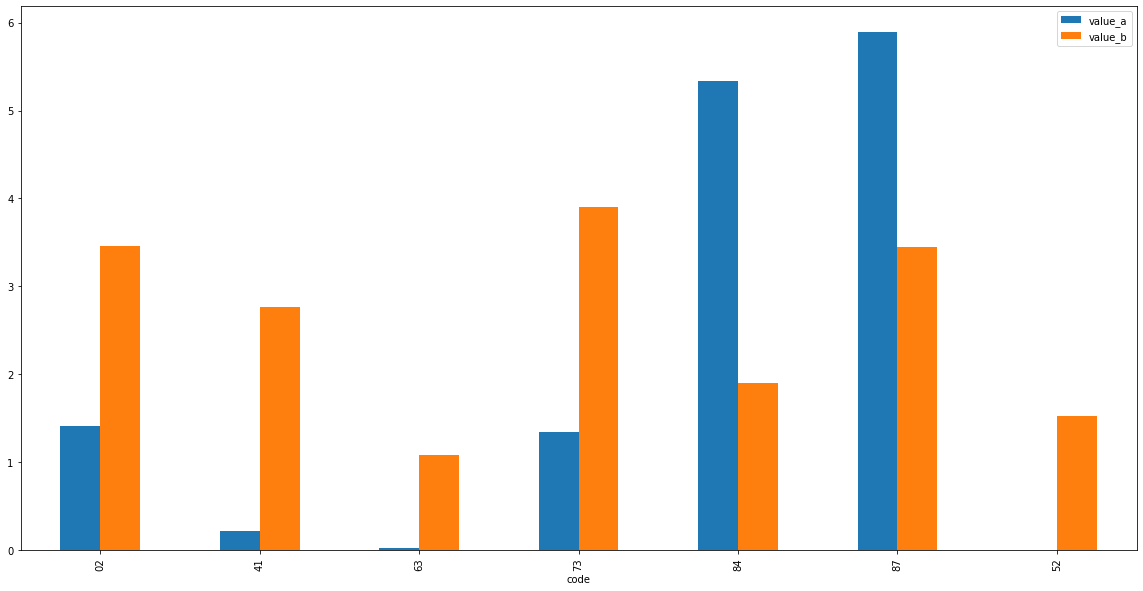

In [19]:
dfi.plot(kind='bar', y=['value_a','value_b'], x='code')
plt.show()

# Aggregation

In [20]:
df = df6
df['CTH6'] = df['code']
df['CTH4'] = df['code'].str.slice(0,4)
df['CTH2'] = df['code'].str.slice(0,2)
dfa = df.groupby('CTH2').filter(lambda group: len(group) > 1)
dfa.groupby(['CTH2', 'CTH4', 'CTH6']).sum()

quantity_a  value_a  quantity_b  value_b  value_diff  \
CTH2 CTH4 CTH6                                                           
02   0202 020220           0     0.00     1268500     2.53       -2.53   
          020230      259000     0.76      313500     0.83       -0.07   
     0206 020629      290000     0.66       25000     0.10        0.56   
11   1102 110220           0     0.00        5000     0.00        0.00   
     1105 110510           0     0.00      621000     0.59       -0.59   
12   1209 120929           0     0.00           4     0.00        0.00   
     1211 121190           4     0.00           0     0.00        0.00   
20   2008 200811        3940     0.01           0     0.00        0.01   
          200819       31504     0.08           0     0.00        0.08   
21   2106 210610           0     0.00          86     0.00        0.00   
          210690         600     0.01       31504     0.08       -0.07   
23   2301 230120       60000     0.07      121618     0.15       -0.08   
     2302 230240           0     0.00     3666763     0.81       -0.81   
     2304 230400           0     0.00     1708760     0.72       -0.72   
     2306 230690     3308000     0.73      114750     0.03        0.70   
     2309 230990      416000     1.08       14050     0.22        0.86   
24   2403 240311         220     0.00         160     0.00        0.00   
          240399         350     0.01           0     0.00        0.01   
28   2811 281119           0     0.00       19600     0.04       -0.04   
     2815 281511           0     0.00       19600     0.04       -0.04   
     2818 281830         600     0.00           0     0.00        0.00   
     2839 283990        1400     0.00           0     0.00        0.00   
29   2901 290129           0     0.00         445     0.05       -0.05   
     2902 290290           0     0.00          25     0.00        0.00   
     2903 290339          50     0.00           0     0.00        0.00   
          290371       14000     0.04           0     0.00        0.04   
     2905 290514          25     0.00           0     0.00        0.00   
     2918 291830         150     0.01           0     0.00        0.01   
     2922 292249         100     0.00           0     0.00        0.00   
          292250         675     0.03           0     0.00        0.03   
     2933 293339          25     0.00          25     0.00        0.00   
          293399          75     0.01        3000     0.01        0.00   
     2934 293499          50     0.00           0     0.00        0.00   
     2941 294110          20     0.00       10230     0.09       -0.09   
          294140         100     0.01         100     0.03       -0.02   
          294150        1650     0.08           0     0.00        0.08   
          294190           0     0.00       23800     0.13       -0.13   
     2942 294200         435     0.03           0     0.00        0.03   
30   3002 300212          73     0.00           0     0.00        0.00   
          300220        5088     1.95       12229     1.74        0.21   
          300230         104     0.01           0     0.00        0.01   
          300290           8     0.02      259218     0.18       -0.16   
     3003 300320          15     0.00           0     0.00        0.00   
          300339           3     0.00           0     0.00        0.00   
     3004 300410         193     0.02       27584     0.36       -0.34   
          300420        7810     0.37         548     0.01        0.36   
          300432           0     0.00        2198     0.04       -0.04   
          300439        1174     0.19         833     0.14        0.05   
          300450        2126     0.07        1328     0.01        0.06   
          300490       21149     1.73       57506     1.66        0.07   
     3005 300590        1600     0.01           0     0.00        0.01   
     3006 300610         172     0.02          52     0.00        0.02   
          300660      